In [1]:
# importando as bibliotecas para leitura dos dados e criação de gráficos

import pandas as pd 
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt 

In [2]:
# configurando pandas para mostrar todas as linhas e colunas

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# configurando pandas para não mostrar notação científica para números

pd.set_option('display.float_format', lambda x: '%.2f' %x)

In [4]:
# Ler os dados da telefonica.

df_clientes = pd.read_csv("C:\\data\\train.csv")

In [5]:
df_clientes.head()

,id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4030,Female,0,No,No,56.00,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0
1,6731,Male,0,Yes,Yes,NaN,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
2,6479,Female,0,Yes,No,60.00,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0
3,6861,Female,0,No,No,37.00,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1
4,3266,Male,0,Yes,Yes,29.00,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1


In [6]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                5634 non-null   int64  
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5416 non-null   object 
 5   tenure            5173 non-null   float64
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


### Entendendo as colunas:

* id: identificação do cliente
* gender: sexo do cliente
* SeniorCitizen: indicador se é um(a) idoso(a)
* Partner: indicador se tem um parceiro(a)
* Dependents: indicador se possui dependentes
* tenure: quantos meses o cliente está na empresa
* PhoneService: indicador se possui serviços de telefonia
* MultipleLines: indicador se possui múltiplas linhas telefônicas
* InternetService: indicador se possui serviços de internet
* OnlineSecurity: indicador se possui serviços de segurança online
* OnlineBackup: indicador se possui serviços de backup online
* DeviceProtection: indicador se possui serviços de proteção de equipamentos
* TechSupport: indicador se possui serviços de suporte técnico
* StreamingTV: indicador se possui serviços de streaming de tv
* StreamingMovies: indicador se possui serviços de streaming de filmes
* Contract: tipo de contrato
* PaperlessBilling: indicador se a cobrança é via papel ou não (cobrança eletrônica)
* PaymentMethod: indicador do tipo de pagamento
* MonthlyCharges: valor mensal dos serviços
* TotalCharges: valor total dos serviços desde o início do contrato
* Churn: indicador se saiu da empresa ou não

In [7]:
# Transformando a coluna id em index do df 

df_clientes = df_clientes.set_index('id')

In [8]:
df_clientes.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
id,,,,,,,,,,,,,,,,,,,,
4030,Female,0,No,No,56.00,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0
6731,Male,0,Yes,Yes,NaN,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
6479,Female,0,Yes,No,60.00,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0
6861,Female,0,No,No,37.00,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1
3266,Male,0,Yes,Yes,29.00,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1


#### A coluna 'TotalCharges' está como object, mas quando olhamos no df percebemos que a columa mostra valores continuos 

In [9]:
# olhando mais datalhado os dados para saber pq a coluna está definada como object 

df_clientes['TotalCharges'].value_counts()

20.2       8
           8
19.55      7
19.75      6
19.9       6
19.45      6
19.65      6
20.05      6
20.25      6
45.3       5
20.15      5
44.4       4
69.6       4
20.3       4
50.15      4
19.3       4
44         4
20.45      4
19.2       4
69.65      4
45.7       3
1284.2     3
20.4       3
70.1       3
49.9       3
19.85      3
470.2      3
74.35      3
20.1       3
50.45      3
35.9       3
24.4       3
50.75      3
69.55      3
74.6       3
19.95      3
220.45     3
69.9       3
20.35      3
85.5       3
70.45      3
74.7       3
69.95      3
80.55      3
75.3       3
69.1       3
70.6       3
69.25      3
45.1       3
19.5       3
383.65     3
44.75      3
25.25      3
70.3       3
1077.5     2
71.65      2
79.15      2
5714.2     2
96.8       2
20.95      2
235.05     2
4858.7     2
2104.55    2
75.35      2
2661.1     2
330.8      2
92.75      2
20.5       2
2560.1     2
469.65     2
223.15     2
300.4      2
398.55     2
86.6       2
70         2
42.9       2
145.15     2

Alguns valores estão com espaços vazios 

In [10]:
# Para converter podemos utilizar o to_numeric com coerção de error 

df_clientes['TotalCharges'] = pd.to_numeric(df_clientes['TotalCharges'], errors='coerce')

In [11]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5634 entries, 4030 to 103
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5634 non-null   object 
 1   SeniorCitizen     5634 non-null   int64  
 2   Partner           5634 non-null   object 
 3   Dependents        5416 non-null   object 
 4   tenure            5173 non-null   float64
 5   PhoneService      5634 non-null   object 
 6   MultipleLines     5634 non-null   object 
 7   InternetService   5634 non-null   object 
 8   OnlineSecurity    5634 non-null   object 
 9   OnlineBackup      5634 non-null   object 
 10  DeviceProtection  5634 non-null   object 
 11  TechSupport       5634 non-null   object 
 12  StreamingTV       5634 non-null   object 
 13  StreamingMovies   5634 non-null   object 
 14  Contract          5634 non-null   object 
 15  PaperlessBilling  5634 non-null   object 
 16  PaymentMethod     5535 non-null   object

In [12]:
#verificando o que foi feito com os linhas que tinham espaços

df_clientes['TotalCharges'].value_counts()

20.20      8
19.55      7
20.25      6
19.65      6
19.90      6
19.45      6
20.05      6
19.75      6
45.30      5
20.15      5
44.40      4
20.30      4
50.15      4
19.30      4
44.00      4
69.60      4
20.45      4
19.20      4
69.65      4
74.35      3
1284.20    3
20.40      3
19.85      3
49.90      3
70.10      3
69.55      3
20.10      3
24.40      3
35.90      3
74.60      3
50.75      3
50.45      3
45.70      3
19.95      3
220.45     3
69.10      3
25.25      3
45.10      3
70.60      3
74.70      3
85.50      3
70.45      3
20.35      3
80.55      3
470.20     3
70.30      3
75.30      3
69.95      3
69.90      3
69.25      3
19.50      3
44.75      3
383.65     3
75.35      2
71.65      2
5714.20    2
92.75      2
79.15      2
20.95      2
330.80     2
2104.55    2
1077.50    2
2661.10    2
235.05     2
96.80      2
4858.70    2
20.50      2
2560.10    2
469.65     2
223.15     2
300.40     2
398.55     2
86.60      2
70.00      2
42.90      2
145.15     2
1046.50    2

In [13]:
#verificando o que foi feito com os linhas que tinham espaços
df_clientes['TotalCharges'].loc[6755]

nan

### Estatística Descritiva

In [14]:
df_clientes.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,5634.00,5173.00,5634.00,5626.00,5634.00
mean,0.16,32.33,64.63,2273.51,0.27
std,0.37,24.46,30.02,2258.38,0.44
min,0.00,0.00,18.25,18.80,0.00
25%,0.00,9.00,35.46,401.59,0.00
50%,0.00,29.00,70.25,1396.12,0.00
75%,0.00,55.00,89.80,3764.29,1.00
max,1.00,72.00,118.75,8684.80,1.00


In [15]:
# Mudando o padrão de quartis para decis

df_clientes.describe(percentiles=np.linspace(0, 1, 11))

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,5634.00,5173.00,5634.00,5626.00,5634.00
mean,0.16,32.33,64.63,2273.51,0.27
std,0.37,24.46,30.02,2258.38,0.44
min,0.00,0.00,18.25,18.80,0.00
0%,0.00,0.00,18.25,18.80,0.00
10%,0.00,2.00,20.05,85.50,0.00
20%,0.00,6.00,25.10,267.00,0.00
30%,0.00,12.00,45.80,550.98,0.00
40%,0.00,20.00,58.60,939.80,0.00
50%,0.00,29.00,70.25,1396.12,0.00


<AxesSubplot:xlabel='tenure', ylabel='Count'>

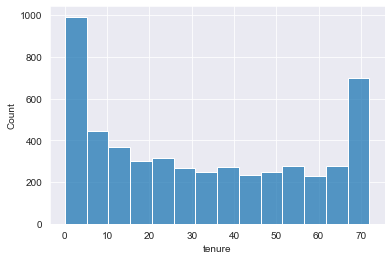

In [16]:
# Analisando a distribução de tenure (quantos meses o cliente está na empresa)

sns.set_style('darkgrid')
plt.tight_layout()

sns.histplot(data=df_clientes, x='tenure')

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

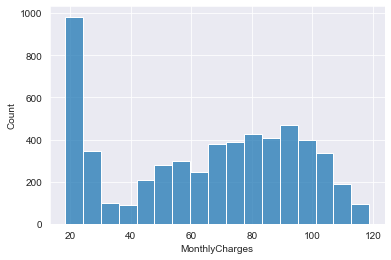

In [17]:
# Analisando a distribuição da cobrança mensal

sns.set_style('darkgrid')

plt.tight_layout()

sns.histplot(data=df_clientes, x= 'MonthlyCharges')

<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

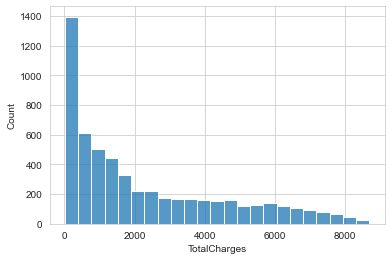

In [18]:
# Analisando a distribuição da cobrança total

sns.set_style('whitegrid')

plt.tight_layout()

sns.histplot(data= df_clientes, x='TotalCharges')

<AxesSubplot:xlabel='Churn', ylabel='count'>

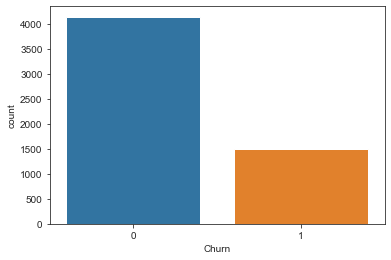

In [19]:
# Analisando a variável target: churn (cancelou os serviços da empresa ou não)

sns.set_style('ticks')

sns.countplot(data=df_clientes, x='Churn')

#### Temos uma base bastante desbalanceada 
        * Então já sabemos que a acurácia não é a melhor métrica 

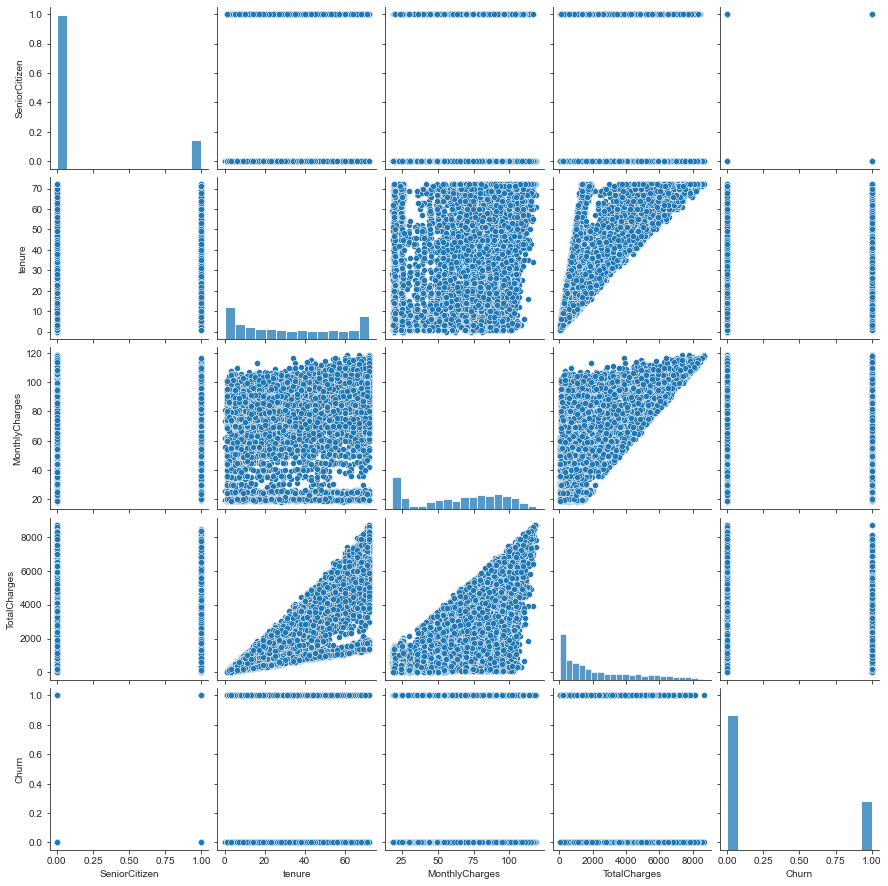

In [20]:
# Relação entre as variaveis preditoras e a variável target

sns.pairplot(data=df_clientes)

Por ser um modelo de classificação o pairplot não trouxe muita informação sobre a relação das variáveis preditoras com a variável target

In [21]:
# codificação de variáveis categoricas 
# Avaliar quantas classes possuem as variáveis categoricas para saber codificar cada uma 

variaveis_categoricas = []

for columns in df_clientes.columns:
    if columns not in df_clientes._get_numeric_data().columns:
        variaveis_categoricas.append(columns)
        
variaveis_categoricas

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [22]:
# Olhando os valores das variaveis 

for coluna_categorica in variaveis_categoricas:
    display(df_clientes[coluna_categorica].value_counts())

Male      2849
Female    2785
Name: gender, dtype: int64

No     2902
Yes    2732
Name: Partner, dtype: int64

No     3793
Yes    1623
Name: Dependents, dtype: int64

Yes    5082
No      552
Name: PhoneService, dtype: int64

No                  2692
Yes                 2390
No phone service     552
Name: MultipleLines, dtype: int64

Fiber optic    2451
DSL            1959
No             1224
Name: InternetService, dtype: int64

No                     2763
Yes                    1647
No internet service    1224
Name: OnlineSecurity, dtype: int64

No                     2488
Yes                    1922
No internet service    1224
Name: OnlineBackup, dtype: int64

No                     2480
Yes                    1930
No internet service    1224
Name: DeviceProtection, dtype: int64

No                     2793
Yes                    1617
No internet service    1224
Name: TechSupport, dtype: int64

No                     2240
Yes                    2170
No internet service    1224
Name: StreamingTV, dtype: int64

No                     2218
Yes                    2192
No internet service    1224
Name: StreamingMovies, dtype: int64

Month-to-month    3084
Two year          1358
One year          1192
Name: Contract, dtype: int64

Yes    3312
No     2322
Name: PaperlessBilling, dtype: int64

Electronic check             1887
Mailed check                 1272
Bank transfer (automatic)    1212
Credit card (automatic)      1164
Name: PaymentMethod, dtype: int64

##### As colunas ['gender','Partner', 'Dependents', 'PhoneService', 'PaperlessBilling'] apresentam duas classes (Yes, No / 'Female', 'Male').  Assim podem ser mapeadas 

In [23]:
# Mapeando gender  

df_clientes['gender'] = df_clientes['gender'].map({'Female': 1, 'Male': 0})

In [24]:
display(df_clientes['gender'].value_counts())

0    2849
1    2785
Name: gender, dtype: int64

In [25]:
# Transformando o restante 

colunas_binarias = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

for coluna in colunas_binarias:
    df_clientes[coluna] = df_clientes[coluna].map({'Yes': 1, 'No': 0})

In [26]:
for c in colunas_binarias:
    display(df_clientes[c].value_counts())

0    2902
1    2732
Name: Partner, dtype: int64

0.00    3793
1.00    1623
Name: Dependents, dtype: int64

1    5082
0     552
Name: PhoneService, dtype: int64

1    3312
0    2322
Name: PaperlessBilling, dtype: int64

In [27]:
# Avaliando pq 'Dependents' ficou como float 

df_clientes.loc[:, colunas_binarias + ['gender']].isnull().sum()

Partner               0
Dependents          218
PhoneService          0
PaperlessBilling      0
gender                0
dtype: int64

A coluna Dependents tem valores nulos e quando convertemos para números ele transforma esses valores nulos para NaN 

In [28]:
# Atualizando quais colunas ainda estão como categoricas 


variaveis_categoricas = [columns for columns in df_clientes.columns if columns not in df_clientes._get_numeric_data().columns]
        
variaveis_categoricas

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [29]:
for coluna_categorica in variaveis_categoricas:
    display(df_clientes[coluna_categorica].value_counts())

No                  2692
Yes                 2390
No phone service     552
Name: MultipleLines, dtype: int64

Fiber optic    2451
DSL            1959
No             1224
Name: InternetService, dtype: int64

No                     2763
Yes                    1647
No internet service    1224
Name: OnlineSecurity, dtype: int64

No                     2488
Yes                    1922
No internet service    1224
Name: OnlineBackup, dtype: int64

No                     2480
Yes                    1930
No internet service    1224
Name: DeviceProtection, dtype: int64

No                     2793
Yes                    1617
No internet service    1224
Name: TechSupport, dtype: int64

No                     2240
Yes                    2170
No internet service    1224
Name: StreamingTV, dtype: int64

No                     2218
Yes                    2192
No internet service    1224
Name: StreamingMovies, dtype: int64

Month-to-month    3084
Two year          1358
One year          1192
Name: Contract, dtype: int64

Electronic check             1887
Mailed check                 1272
Bank transfer (automatic)    1212
Credit card (automatic)      1164
Name: PaymentMethod, dtype: int64

##### As colunas ['Contract', 'PaymentMethod', 'InternetService'] vamos tratar como ordinal. 

In [30]:
df_clientes['Contract'] = df_clientes['Contract'].map({'Month-to-month': 0, 'One year': 1, 'Two year': 2})

df_clientes['PaymentMethod'] = df_clientes['PaymentMethod'].map({'Electronic check': 0, 
                                                                 'Mailed check': 1, 
                                                                 'Bank transfer (automatic)': 2,
                                                                 'Credit card (automatic)': 3})

df_clientes['InternetService'] = df_clientes['InternetService'].map({'No': 0, 'DSL': 1, 'Fiber optic':2})

In [31]:
df_clientes.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
id,,,,,,,,,,,,,,,,,,,,
4030,1,0,0,0.00,56.00,0,No phone service,1,Yes,Yes,Yes,Yes,No,No,2,0,NaN,45.05,2560.10,0
6731,0,0,1,1.00,NaN,1,No,0,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,1,0,1.00,19.65,332.65,0
6479,1,0,1,0.00,60.00,1,Yes,2,No,Yes,Yes,Yes,Yes,Yes,2,1,3.00,110.80,6640.70,0
6861,1,0,0,0.00,37.00,1,Yes,2,No,Yes,Yes,No,Yes,Yes,0,1,2.00,101.90,3545.35,1
3266,0,0,1,1.00,29.00,1,No,2,No,No,No,No,No,No,0,1,0.00,70.75,1974.80,1


In [32]:
# Atualizando quais colunas ainda estão como categoricas 


variaveis_categoricas = [columns for columns in df_clientes.columns if columns not in df_clientes._get_numeric_data().columns]
        
variaveis_categoricas

['MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

Vamos usar OHE para essas variáveis nominais 

In [33]:
from sklearn.preprocessing import OneHotEncoder

In [34]:
ohe = OneHotEncoder(sparse=False, drop='first')

df_one_transformadas = ohe.fit_transform(df_clientes[variaveis_categoricas])

ohe.categories_

[array(['No', 'No phone service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object)]

In [35]:
ohe.get_feature_names_out()

array(['MultipleLines_No phone service', 'MultipleLines_Yes',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes'],
      dtype=object)

In [36]:
# Transformando o array numpy em colunas 

df_one_transformadas = pd.DataFrame(data=df_one_transformadas, columns=ohe.get_feature_names_out(), index= df_clientes.index)

df_one_transformadas.head()

,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
id,,,,,,,,,,,,,,
4030,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00
6731,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00
6479,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00
6861,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00
3266,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Juntando o df OHE e O df original 

Ao usar concat ele junta varios df com base no index 

In [37]:
# axis=0 ele apensaria as linhas, axis=1 ele junta as colunas 

df_clientes = pd.concat([df_clientes, df_one_transformadas], axis=1)

df_clientes.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4030,1,0,0,0.00,56.00,0,No phone service,1,Yes,Yes,Yes,Yes,No,No,2,0,NaN,45.05,2560.10,0,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00
6731,0,0,1,1.00,NaN,1,No,0,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,1,0,1.00,19.65,332.65,0,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00
6479,1,0,1,0.00,60.00,1,Yes,2,No,Yes,Yes,Yes,Yes,Yes,2,1,3.00,110.80,6640.70,0,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00
6861,1,0,0,0.00,37.00,1,Yes,2,No,Yes,Yes,No,Yes,Yes,0,1,2.00,101.90,3545.35,1,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00
3266,0,0,1,1.00,29.00,1,No,2,No,No,No,No,No,No,0,1,0.00,70.75,1974.80,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [38]:
# removendo as colunas originais 

df_clientes = df_clientes.drop(variaveis_categoricas, axis=1)

df_clientes.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
id,,,,,,,,,,,,,,,,,,,,,,,,,,,
4030,1,0,0,0.00,56.00,0,1,2,0,NaN,45.05,2560.10,0,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00
6731,0,0,1,1.00,NaN,1,0,1,0,1.00,19.65,332.65,0,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00
6479,1,0,1,0.00,60.00,1,2,2,1,3.00,110.80,6640.70,0,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00
6861,1,0,0,0.00,37.00,1,2,0,1,2.00,101.90,3545.35,1,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00
3266,0,0,1,1.00,29.00,1,2,0,1,0.00,70.75,1974.80,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [39]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5634 entries, 4030 to 103
Data columns (total 27 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   gender                                5634 non-null   int64  
 1   SeniorCitizen                         5634 non-null   int64  
 2   Partner                               5634 non-null   int64  
 3   Dependents                            5416 non-null   float64
 4   tenure                                5173 non-null   float64
 5   PhoneService                          5634 non-null   int64  
 6   InternetService                       5634 non-null   int64  
 7   Contract                              5634 non-null   int64  
 8   PaperlessBilling                      5634 non-null   int64  
 9   PaymentMethod                         5535 non-null   float64
 10  MonthlyCharges                        5634 non-null   float64
 11  TotalCharges   

### Determinando as variáveis preditoras e a variável target 

Variáveis preditoras: X 

Variável target: y 

In [40]:
X = df_clientes.drop('Churn', axis= 1)

X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
id,,,,,,,,,,,,,,,,,,,,,,,,,,
4030,1,0,0,0.00,56.00,0,1,2,0,NaN,45.05,2560.10,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00
6731,0,0,1,1.00,NaN,1,0,1,0,1.00,19.65,332.65,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00
6479,1,0,1,0.00,60.00,1,2,2,1,3.00,110.80,6640.70,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00
6861,1,0,0,0.00,37.00,1,2,0,1,2.00,101.90,3545.35,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00
3266,0,0,1,1.00,29.00,1,2,0,1,0.00,70.75,1974.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [41]:
y = df_clientes[['Churn']]

y.head()

,Churn
id,
4030,0
6731,0
6479,0
6861,1
3266,1


### Separação de bases 

In [42]:
# Vamos usar cross validation 

from sklearn.model_selection import train_test_split

In [43]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=.2, random_state=42)

In [44]:
# Olhando quantas linhas ficou 

X_teste.shape, X_treino.shape, y_teste.shape, y_treino.shape

((1127, 26), (4507, 26), (1127, 1), (4507, 1))

### Tratamento de dados faltantes (missing data)

Vamos usar medidas de tendência central  

In [45]:
#Verificando as colunas com dados faltantes 

X_treino.loc[:, X_treino.isnull().sum() > 0].columns

Index(['Dependents', 'tenure', 'PaymentMethod', 'TotalCharges'], dtype='object')

In [46]:
X_teste.loc[:, X_teste.isnull().sum() > 0].columns

Index(['Dependents', 'tenure', 'PaymentMethod', 'TotalCharges'], dtype='object')

##### 'Dependents', 'tenure', 'PaymentMethod', 'TotalCharges' são as colunas que apresentam missing data 

In [47]:
# Antes de aplicar as medidas de tendência central vamos fazer uma copia de X_treino, X_teste, y_treino, y_teste 
#  para salvar esse splip

X_treino_original = X_treino.copy()
X_teste_original = X_teste.copy()

y_teste_original = y_teste.copy()
y_treino_original = y_treino.copy()

Importante fazer as alterações apenas na base de treino 

In [48]:
# Para as variáveis numéricas vamos usar mediana. Para as categóricas a moda 

mediana_tenure = X_treino['tenure'].median()
mediana_dependents = X_treino['Dependents'].median()
mediana_TotalCharges = X_treino['TotalCharges'].median()

moda_PaymentMethod = X_treino['PaymentMethod'].value_counts().index[0]

mediana_dependents, mediana_tenure, mediana_TotalCharges, moda_PaymentMethod

(0.0, 29.0, 1389.6, 0.0)

In [49]:
X_treino.loc[X_treino['tenure'].isnull(), 'tenure'] = mediana_tenure

X_treino.loc[X_treino['Dependents'].isnull(), 'Dependents'] = mediana_dependents

X_treino.loc[X_treino['TotalCharges'].isnull(), 'TotalCharges'] = mediana_TotalCharges

X_treino.loc[X_treino['PaymentMethod'].isnull(), 'PaymentMethod'] = moda_PaymentMethod

In [50]:
X_treino.isnull().sum()

gender                                  0
SeniorCitizen                           0
Partner                                 0
Dependents                              0
tenure                                  0
PhoneService                            0
InternetService                         0
Contract                                0
PaperlessBilling                        0
PaymentMethod                           0
MonthlyCharges                          0
TotalCharges                            0
MultipleLines_No phone service          0
MultipleLines_Yes                       0
OnlineSecurity_No internet service      0
OnlineSecurity_Yes                      0
OnlineBackup_No internet service        0
OnlineBackup_Yes                        0
DeviceProtection_No internet service    0
DeviceProtection_Yes                    0
TechSupport_No internet service         0
TechSupport_Yes                         0
StreamingTV_No internet service         0
StreamingTV_Yes                   

### Marchine Learning 

In [51]:
# Vamos usar Regressão logística 

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [52]:
# Criando o algoritmo
regressao_logistica = LogisticRegression(max_iter=500)

# Vamos treinar usando cross validation e a métrica será F1-Score  
valores_f1_rl = cross_val_score(estimator=regressao_logistica,
                                 X=X_treino,
                                 y=y_treino.values.flatten(), # flatten-Retorna uma cópia da matriz recolhida em uma dimensão.
                                 cv=10,
                                 scoring='f1')

valores_f1_rl

array([0.61883408, 0.61403509, 0.5877193 , 0.55357143, 0.66071429,
       0.63519313, 0.66956522, 0.60526316, 0.54285714, 0.6036036 ])

In [53]:
# Média de F1 para o algoritmo de regressão Logística 

media_f1_rl = valores_f1_rl.mean()
f'F1 Score:{media_f1_rl*100}'

'F1 Score:60.913564357621134'

In [54]:
# Vamos testar com Radon Forest

from sklearn.ensemble import RandomForestClassifier

In [55]:
random_forest = RandomForestClassifier()

valores_f1_rf = cross_val_score(estimator=random_forest,
                                X=X_treino,
                                y=y_treino.values.flatten(),
                                cv=10,
                                scoring='f1')

valores_f1_rf

array([0.59813084, 0.55454545, 0.57142857, 0.48372093, 0.59330144,
       0.60377358, 0.60273973, 0.53881279, 0.52830189, 0.60185185])

In [56]:
media_f1_rf = valores_f1_rf.mean()
f'F1 Score:{media_f1_rf*100}'

'F1 Score:56.76607067700268'

In [57]:
# Vamos usar XGBoost 

import xgboost as xgb

C:\Users\maria\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [58]:
xgb_model = xgb.XGBClassifier(random_state=42,
                              objective='binary:logistic',
                              use_label_encoder=False,
                               eval_metric='error')


In [59]:
type(xgb_model)

xgboost.sklearn.XGBClassifier

In [60]:
valores_f1_xgb = cross_val_score(estimator=xgb_model,
                                 X=X_treino,
                                 y=y_treino.values.flatten(),
                                 cv=10,
                                 scoring='f1')
valores_f1_xgb

C:\Users\maria\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\maria\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\maria\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\maria\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future

array([0.58715596, 0.59292035, 0.55411255, 0.50458716, 0.60986547,
       0.6036036 , 0.60526316, 0.55506608, 0.5       , 0.60633484])

In [61]:
media_f1_xgb = valores_f1_xgb.mean()
f'F1 Score:{media_f1_xgb*100}'

'F1 Score:57.18909180635382'

### Feature Engineering

Vamos tentar mudar a imputação dos dados faltantes para ver se melhora 

In [62]:
# Revisando os dados faltandes (antes do split)

X.isnull().sum()

gender                                    0
SeniorCitizen                             0
Partner                                   0
Dependents                              218
tenure                                  461
PhoneService                              0
InternetService                           0
Contract                                  0
PaperlessBilling                          0
PaymentMethod                            99
MonthlyCharges                            0
TotalCharges                              8
MultipleLines_No phone service            0
MultipleLines_Yes                         0
OnlineSecurity_No internet service        0
OnlineSecurity_Yes                        0
OnlineBackup_No internet service          0
OnlineBackup_Yes                          0
DeviceProtection_No internet service      0
DeviceProtection_Yes                      0
TechSupport_No internet service           0
TechSupport_Yes                           0
StreamingTV_No internet service 

##### Tenure tem bastante dados faltantes. Antes usamos a mediana para imputar esses dados. Agora vamos dividir TotalCharges pelo valor de MonthlyCharges e vamos ter uma estimativa de quantos meses o cliente está com o serviço (tenure)


In [63]:
# Pegando somente a coluna tenure para não mudar as outras imputações 

X_treino['tenure'] = X_treino_original['tenure']

X_teste['tenure'] = X_teste_original['tenure']

In [64]:
X_treino['tenure'].isnull().sum()

366

In [65]:
# Assim  nas linhas de 'tenure' que vazias pegamos os valores de 'TotalCharges' e dividimos pelo valor de 'MonthlyCharges'

X_treino.loc[X_treino['tenure'].isna(),'tenure'] = X_treino.loc[X_treino['tenure'].isna(), 'TotalCharges'] / X_treino.loc[X_treino['tenure'].isna(), 'MonthlyCharges']

In [66]:
X_treino['tenure'].isnull().sum()

0

In [67]:
# O nosso melhor algoritmo foi regressao_logistica. Então vamos testar novamente com essa mudança em tenure 

rl_2 = LogisticRegression(max_iter=500)

valores_f1_rl2 = cross_val_score(estimator=rl_2,
                                 X=X_treino,
                                 y=y_treino.values.flatten(),
                                 cv=10,
                                 scoring='f1')

valores_f1_rl2

array([0.6036036 , 0.66960352, 0.62337662, 0.57894737, 0.65217391,
       0.64166667, 0.65531915, 0.61333333, 0.58604651, 0.64573991])

In [68]:
media_f1_rl2 = valores_f1_rl2.mean()
f'F1 Score:{media_f1_rl2*100}'

'F1 Score:62.69810603551812'

 O F1 Score deu 62.69% tivemos uma melhora 

#### Vamos fazer a imputação utilizando KNNImputer na coluna Dependents

In [69]:
X_treino['Dependents'] = X_treino_original['Dependents']

In [70]:
X_treino['Dependents'].isnull().sum()

171

In [71]:
from sklearn.impute import KNNImputer

In [72]:
imputacao_knn = KNNImputer(n_neighbors=2)

treino_imputado = imputacao_knn.fit_transform(X_treino)

In [73]:
X_treino['Dependents'] = treino_imputado[:,3]

X_treino['Dependents'].isnull().sum()

0

In [74]:
# O nosso melhor algoritmo foi regressao_logistica. Então vamos testar novamente com essa mudança em Dependents

valores_f1_rl3 = cross_val_score(estimator=rl_2,
                                 X=X_treino,
                                 y=y_treino.values.flatten(),
                                 cv=10,
                                 scoring='f1')
valores_f1_rl3

array([0.6036036 , 0.68421053, 0.62337662, 0.57894737, 0.64912281,
       0.64166667, 0.66094421, 0.62831858, 0.57276995, 0.64573991])

In [75]:
media_f1_rl3 = valores_f1_rl3.mean()
f'F1 Score:{media_f1_rl3*100}'

'F1 Score:62.88700248846204'

### Continuano a Feature Engineering... Vamos criar novas variáveis derivadas.

Isso é possivel pois conseguimos buscar padrões e as máquinas ainda não conseguem 

In [76]:
X_treino.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
id,,,,,,,,,,,,,,,,,,,,,,,,,,
3559,0,0,1,0.50,28.00,1,2,1,0,2.00,92.20,2568.15,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00
896,0,0,0,0.00,30.00,1,2,0,1,0.00,94.30,2679.70,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
3600,1,0,1,1.00,45.00,1,1,0,0,1.00,81.30,3541.10,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00
6991,0,0,1,0.00,36.00,1,2,0,1,0.00,93.60,3366.05,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00
5455,1,1,1,0.00,1.00,1,2,0,1,0.00,69.55,69.55,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [77]:
# O cliente tem ou não tem internet - derivado da coluna InternetService que mostra se ele tem fibra, dsl ou não tem Internet 
# Ao usar o isin ele retorna um bool, dessa maneira usamos astype(int) para converter para numerico 

X_treino['TemInternet'] = X_treino['InternetService'].isin([1,2]).astype(int)

In [78]:
# Possui fidelidade - Vamos usar a coluna Contract que motra se o contaro é mensal, 1 ou 2 anos 
#  aqueles que tem contrato de 1 e 2 vamos colocar que tem fidelidade 

X_treino['TemFidelidade'] = X_treino['Contract'].isin([1,2]).astype(int)

In [79]:
# Contando o total de serviços 

X_treino['TotalServicos'] = X_treino['TemInternet'] + X_treino['OnlineSecurity_Yes'] + X_treino['MultipleLines_Yes'] + \
                            X_treino['OnlineBackup_Yes'] + X_treino['DeviceProtection_Yes'] +\
                            X_treino['TechSupport_Yes'] + X_treino['StreamingTV_Yes'] + \
                            X_treino['StreamingMovies_Yes'] + X_treino['PhoneService']

In [80]:
# Vamos criar um valor por media de cobrança 

X_treino['MediaCobrancaServico'] = X_treino['MonthlyCharges'] / X_treino['TotalServicos']

In [81]:
X_treino.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,TemInternet,TemFidelidade,TotalServicos,MediaCobrancaServico
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3559,0,0,1,0.50,28.00,1,2,1,0,2.00,92.20,2568.15,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1,1,5.00,18.44
896,0,0,0,0.00,30.00,1,2,0,1,0.00,94.30,2679.70,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1,0,6.00,15.72
3600,1,0,1,1.00,45.00,1,1,0,0,1.00,81.30,3541.10,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,1,0,8.00,10.16
6991,0,0,1,0.00,36.00,1,2,0,1,0.00,93.60,3366.05,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1,0,5.00,18.72
5455,1,1,1,0.00,1.00,1,2,0,1,0.00,69.55,69.55,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,0,2.00,34.77


In [82]:
# O nosso melhor algoritmo foi regressao_logistica. Então vamos testar novamente 

valores_f1_rl4 = cross_val_score(estimator=regressao_logistica,
                                 X=X_treino,
                                 y=y_treino.values.flatten(),
                                 cv=10,
                                 scoring='f1')

valores_f1_rl4

array([0.62831858, 0.66079295, 0.62337662, 0.58515284, 0.65789474,
       0.63333333, 0.65811966, 0.60829493, 0.58333333, 0.61538462])

In [83]:
media_f1_rl4 = valores_f1_rl4.mean()

f'F1 Score:{media_f1_rl4*100}'

'F1 Score:62.5400160530584'

### Melhor modelo Regressão Logística - valores_f1_rl3

Vamos treinar na base toda 

In [84]:
# Vamos voltar o X_treino sem as mudanças e fazer apenas aquelas que mostraram melhor resultado 

X_treino = X_treino_original

X_treino.loc[X_treino['tenure'].isna(),'tenure'] = X_treino.loc[X_treino['tenure'].isna(),'TotalCharges'] / X_treino.loc[X_treino['tenure'].isna(), 'MonthlyCharges']

X_treino.loc[X_treino['TotalCharges'].isnull(), 'TotalCharges'] = mediana_TotalCharges

X_treino.loc[X_treino['PaymentMethod'].isnull(), 'PaymentMethod'] = moda_PaymentMethod


In [87]:
imputacao_knn = KNNImputer(n_neighbors=2)

treino_imputado = imputacao_knn.fit_transform(X_treino)

X_treino['Dependents'] = treino_imputado[:,3]

In [89]:
# Verificando se ficou algum nulo 

X_treino.isnull().sum()

gender                                  0
SeniorCitizen                           0
Partner                                 0
Dependents                              0
tenure                                  0
PhoneService                            0
InternetService                         0
Contract                                0
PaperlessBilling                        0
PaymentMethod                           0
MonthlyCharges                          0
TotalCharges                            0
MultipleLines_No phone service          0
MultipleLines_Yes                       0
OnlineSecurity_No internet service      0
OnlineSecurity_Yes                      0
OnlineBackup_No internet service        0
OnlineBackup_Yes                        0
DeviceProtection_No internet service    0
DeviceProtection_Yes                    0
TechSupport_No internet service         0
TechSupport_Yes                         0
StreamingTV_No internet service         0
StreamingTV_Yes                   

In [90]:
# Fazendo a imputação com o teste 

X_teste = X_teste_original

mediana_TotalCharges_teste = X_teste['TotalCharges'].median()

moda_PaymentMethod_teste = X_teste['PaymentMethod'].value_counts().index[0]

X_teste.loc[X_teste['tenure'].isna(),'tenure'] = X_teste.loc[X_teste['tenure'].isna(),'TotalCharges'] / X_teste.loc[X_teste['tenure'].isna(), 'MonthlyCharges']

X_teste.loc[X_teste['TotalCharges'].isnull(), 'TotalCharges'] = mediana_TotalCharges_teste

X_teste.loc[X_teste['PaymentMethod'].isnull(), 'PaymentMethod'] = moda_PaymentMethod_teste

In [91]:
teste_imputado = imputacao_knn.fit_transform(X_teste)

X_teste['Dependents'] = teste_imputado[:,3]

In [92]:
X_teste.isnull().sum()

gender                                  0
SeniorCitizen                           0
Partner                                 0
Dependents                              0
tenure                                  0
PhoneService                            0
InternetService                         0
Contract                                0
PaperlessBilling                        0
PaymentMethod                           0
MonthlyCharges                          0
TotalCharges                            0
MultipleLines_No phone service          0
MultipleLines_Yes                       0
OnlineSecurity_No internet service      0
OnlineSecurity_Yes                      0
OnlineBackup_No internet service        0
OnlineBackup_Yes                        0
DeviceProtection_No internet service    0
DeviceProtection_Yes                    0
TechSupport_No internet service         0
TechSupport_Yes                         0
StreamingTV_No internet service         0
StreamingTV_Yes                   

In [93]:
# Fazendo o Fit na base inteira 

regressao_logistica.fit(X_treino, y_treino.values.flatten())

LogisticRegression(max_iter=500)

In [94]:
# Analisando coeficientes 

df_coeficientes = pd.DataFrame(regressao_logistica.coef_)

df_coeficientes.columns = regressao_logistica.feature_names_in_

df_coeficientes

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,-0.00,0.35,-0.06,-0.20,-0.07,-0.32,0.41,-0.75,0.44,-0.10,0.00,0.00,0.10,0.24,-0.12,-0.55,-0.12,-0.24,-0.12,-0.17,-0.12,-0.46,-0.12,0.14,-0.12,0.10


### Com o modelo final agora vamos fazer inferências dos valores do Churn 

In [95]:
# O estimador foi treinado com (fit) - estimador prediz com (predict)

predicao_churn = regressao_logistica.predict(X_teste)

In [96]:
# verificando se foi em toda base de teste

len(predicao_churn)

1127

In [97]:
#Comparando

predicao_vs_real = pd.DataFrame({'predicao': predicao_churn.flatten(), 'real': y_teste.values.flatten()})

predicao_vs_real.head(20)

,predicao,real
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
5,0,0
6,1,1
7,0,0
8,0,0
9,0,0


In [98]:
# Calculando o F1 Score 

from sklearn.metrics import f1_score

f1_score(y_true=y_teste, y_pred=predicao_churn)

0.5824175824175825

#### O F1 - Score (média harmônica da precisão e da Sensibilidade) foi de 58,24%

Apresentou uma queda 